# Cat and Dog Image Classifier

## Overview

This project represents a submission for the "[Machine Learning with Python](https://www.freecodecamp.org/learn/machine-learning-with-python/#how-neural-networks-work)" course by freeCodeCamp. The project's focus is to implement a functional image classifier capable of accurately **categorizing images of cats and dogs using convolutional neural networks** (CNNs). The classifier will be developed using TensorFlow 2.0 and Keras libraries. The primary challenge is to achieve a minimum accuracy of 63% in distinguishing between the two classes.

> The "Cat and Dog Image Clasifier" challenge link is [here](https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/cat-and-dog-image-classifier).


```
Nattawut Chamcheun (Friend)
Date: 11-08-2023
```

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2023-08-11 07:40:10--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M   146MB/s    in 0.5s    

2023-08-11 07:40:10 (146 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# 3

# Create image generators for each of the three image data sets (train, validation, test).
train_image_generator = ImageDataGenerator(rescale=1./255,)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(
                                                      '/content/cats_and_dogs/train',
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      batch_size=batch_size,
                                                      class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
                                                      '/content/cats_and_dogs/validation',
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      batch_size=batch_size,
                                                      class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
                                                      '/content/cats_and_dogs/test',
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      batch_size=5,
                                                      class_mode=None,
                                                      shuffle=False,
                                                      classes=['.'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


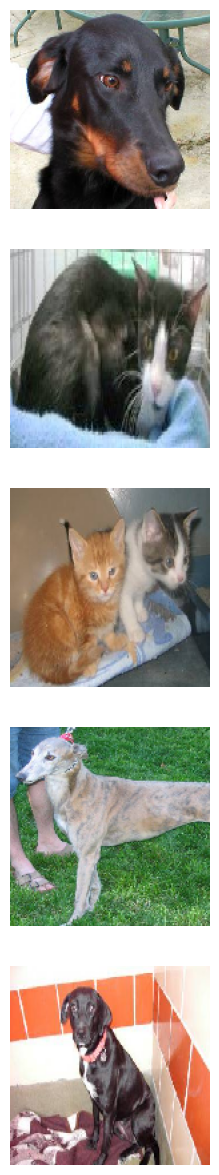

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5

# Define the data augmentation settings for training images
train_image_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range=360,
                                            width_shift_range=0.3,
                                            height_shift_range=0.3,
                                            shear_range=0.3,
                                            zoom_range=0.3,
                                            horizontal_flip=True,
                                            vertical_flip=True,
                                          )


Found 2000 images belonging to 2 classes.


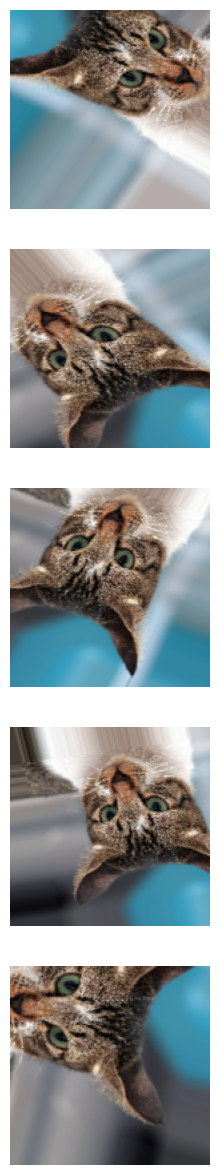

In [ ]:
# 6

# See the result of data augmentation
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7

#  Create a model for the neural network that outputs class probabilities
model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Define an optimizer, in this case using 'Adam' optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_432 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_433 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_434 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 17, 17, 128)    

In [ ]:
# Define checkpoints for thr model

model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/checkpoints/cat_and_dog_classifier.h5',
                                                    save_best_only=True,
                                                    monitor='val_accuracy',
                                                    mode='max',
                                                    verbose=1)

In [ ]:
# 8

# Train the model
history = model.fit(train_data_gen,
                    epochs=30,
                    steps_per_epoch=train_data_gen.samples // batch_size,
                    validation_data=val_data_gen,
                    validation_steps=val_data_gen.samples // batch_size,
                    callbacks=[model_checkpoint])

Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 0.7083 - accuracy: 0.4920
Epoch 1: val_accuracy improved from -inf to 0.49330, saving model to /content/checkpoints/cat_and_dog_classifier.h5
15/15 [==============================] - 77s 987ms/step - loss: 0.7083 - accuracy: 0.4920 - val_loss: 0.6948 - val_accuracy: 0.4933
Epoch 2/30
15/15 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.5438
Epoch 2: val_accuracy improved from 0.49330 to 0.59821, saving model to /content/checkpoints/cat_and_dog_classifier.h5
15/15 [==============================] - 15s 1s/step - loss: 0.6899 - accuracy: 0.5438 - val_loss: 0.6837 - val_accuracy: 0.5982
Epoch 3/30
15/15 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.5411
Epoch 3: val_accuracy improved from 0.59821 to 0.60714, saving model to /content/checkpoints/cat_and_dog_classifier.h5
15/15 [==============================] - 15s 989ms/step - loss: 0.6870 - accuracy: 0.5411 - val_loss: 0

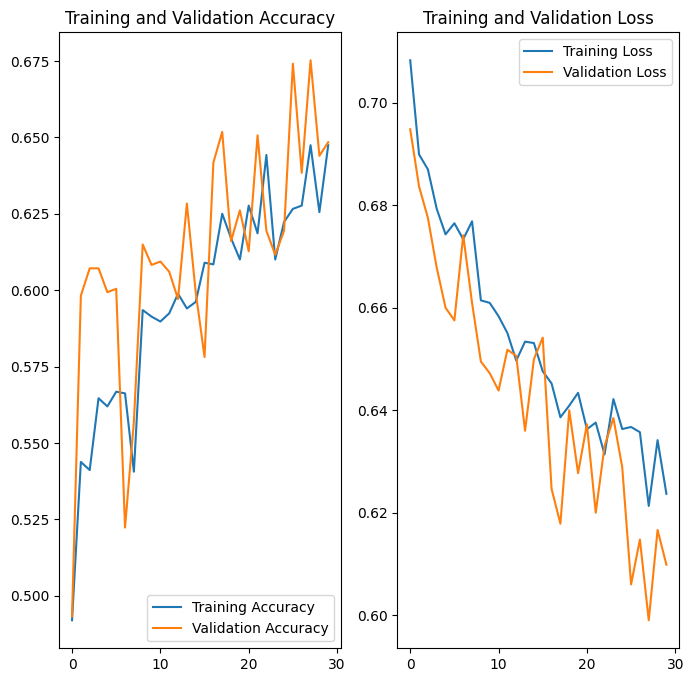

In [ ]:
# 9

# Visualize the accuracy and loss of the model.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#  Predict whether a brand new image is a cat or a dog.

predictions = model.predict(test_data_gen)
predictions[:5]

# 0 is cat
# 1 is dog

10/10 [==============================] - 0s 8ms/step


array([[0.46040836, 0.5395916 ],
       [0.6214145 , 0.3785855 ],
       [0.5735694 , 0.42643052],
       [0.19076289, 0.8092371 ],
       [0.45914668, 0.5408533 ]], dtype=float32)

In [ ]:
#  Get the probability that each test is a dog or a cat.

probabilities = []
for i in range(0, len(predictions)):
  probabilities.append(predictions[i][1])

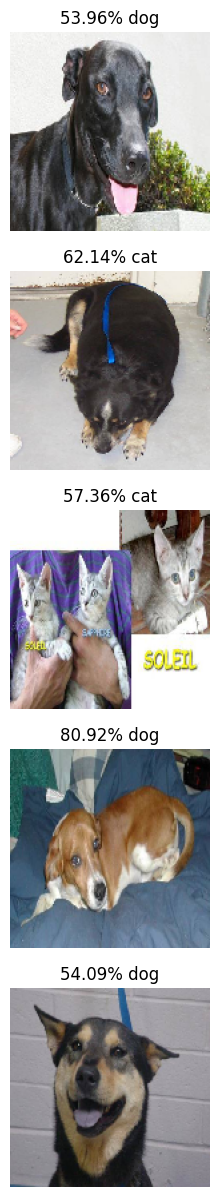

In [ ]:
# Plot the images and the percentage of "sure" that the image is a cat or a dog

sample_test_images = next(test_data_gen)
plotImages(sample_test_images[:5], probabilities[:5])

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
